In [8]:
# Librerias

import os
import pandas as pd
import sys
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 


# 1. Análisis del modelo

Primero se cargaran los resultados del modelo:

## A. Métricas de evaluación

Durante los tres primeros meses de evaluación del modelo, se observa un rendimiento estable pero moderado, con pequeñas variaciones mensuales que revelan cómo el modelo se comportó frente a los cambios en los datos, posiblemente influenciados por el inicio de la pandemia de COVID-19.

In [20]:
csv_path = os.path.join(project_root, "data", "evaluation", "metrics_by_month.csv")

df_metrics = pd.read_csv(csv_path)
df_metrics

,mes,cantidad_ejemplos,f1_score,accuracy,roc_auc,precision,recall,log_loss,balanced_accuracy
0,2020-02,100000,0.499953,0.52587,0.563651,0.615253,0.421047,0.708114,0.540963
1,2020-03,100000,0.527416,0.53700,0.573960,0.621611,0.458012,0.700765,0.548613
2,2020-04,100000,0.489733,0.56314,0.579693,0.502120,0.477943,0.685050,0.553826


Desempeño global:

- F1-score osciló entre 0.49 y 0.53, lo que indica un desempeño consistente pero limitado para equilibrar precisión y recall.

- La precisión fue más alta en febrero y marzo (~0.62), cayendo en abril a 0.50. Esto sugiere que el modelo inicialmente era más confiable al predecir propinas altas, pero perdió precisión en abril.

- El recall, por el contrario, mostró una mejora progresiva: desde 0.42 en febrero a 0.48 en abril. Es decir, el modelo comenzó a identificar más casos reales de propina alta, aunque sacrificando precisión.

- El ROC AUC también muestra una tendencia positiva, pasando de 0.56 a 0.58, lo que indica una leve mejora en la capacidad del modelo para discriminar entre clases.

- Accuracy aumentó gradualmente (0.52 → 0.56), aunque este valor puede estar sesgado por el desbalance de clases.

- El log loss disminuyó levemente con el tiempo (0.71 → 0.68), lo cual sugiere que el modelo fue más “seguro” al asignar probabilidades en abril.

---

## B. Matrices de confusión

A lo largo de los meses analizados (febrero a abril de 2020), se observa que el modelo presenta distintos comportamientos en la clasificación de propinas altas y bajas. 
- En febrero, el modelo muestra una clara tendencia a equivocarse con las propinas altas, con una alta cantidad de falsos negativos. 
- En marzo, el desempeño mejora con un mayor equilibrio entre verdaderos positivos y negativos, reflejando una mejor capacidad del modelo para identificar correctamente las propinas altas. 
- Sin embargo, en abril se revierte parcialmente esta mejora: si bien aumenta la cantidad de verdaderos negativos, también se incrementan los falsos positivos y disminuyen los verdaderos positivos, lo que sugiere que el modelo vuelve a enfocarse más en la detección de propinas bajas, reduciendo su sensibilidad hacia la clase positiva. Esta variación mensual podría estar influenciada por cambios en el comportamiento debido al inicio de la pandemia del COVID-19.


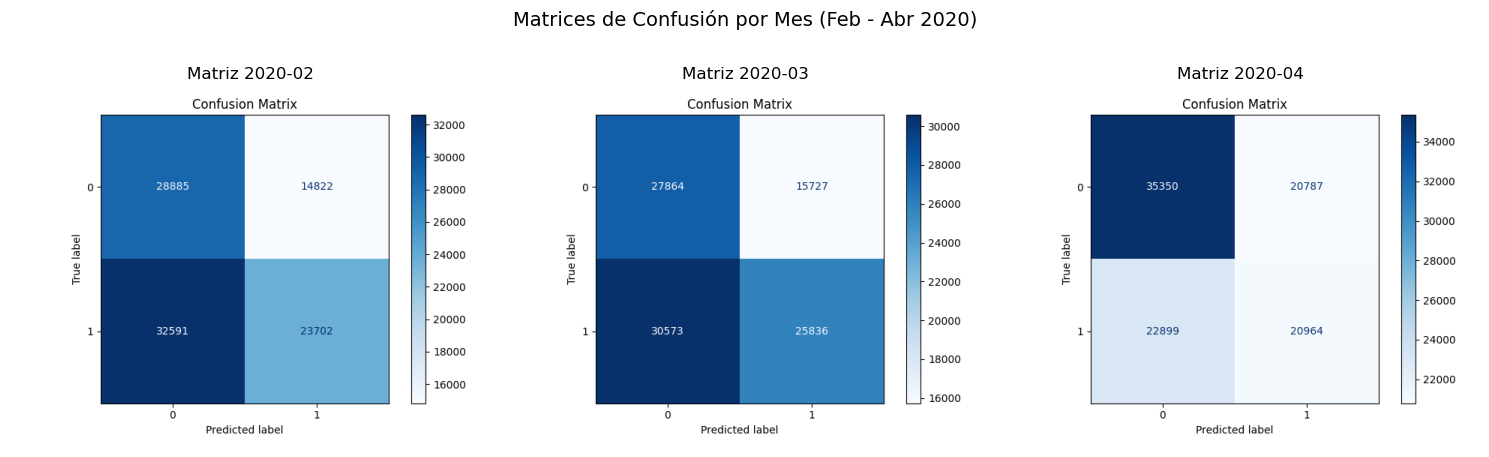

In [23]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta desde el notebook
conf_matrix_dir = os.path.join("..", "visualization", "conf_matrix")
output_path = os.path.join("..", "visualization", "conf_matrix", "conf_matrix_consolidada.png")

# Orden explícito de los meses
meses_ordenados = ["2020-02", "2020-03", "2020-04"]
archivos_ordenados = [f"conf_matrix_{mes}.png" for mes in meses_ordenados]

# Crear figura con subplots
fig, axs = plt.subplots(1, len(archivos_ordenados), figsize=(15, 5))

for i, archivo in enumerate(archivos_ordenados):
    img_path = os.path.join(conf_matrix_dir, archivo)
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"Matriz {meses_ordenados[i]}")

plt.suptitle("Matrices de Confusión por Mes (Feb - Abr 2020)", fontsize=14)
plt.tight_layout()

# Guardar figura consolidada
plt.savefig(output_path, dpi=300)

# Mostrar en pantalla
plt.show()



---

## C. Curva ROC

Las curvas ROC para los meses de febrero a abril de 2020 muestran un rendimiento intermedio del modelo en la clasificación de propinas altas.
Aunque las curvas se mantienen por encima de la línea diagonal (azar), los valores del AUC son bajos: 0.56 en febrero, 0.57 en marzo y 0.58 en abril. 
Esto indica que el modelo tiene una capacidad limitada para discriminar entre propinas altas y bajas, aunque se observa una ligera mejora progresiva en su poder predictivo durante estos meses.

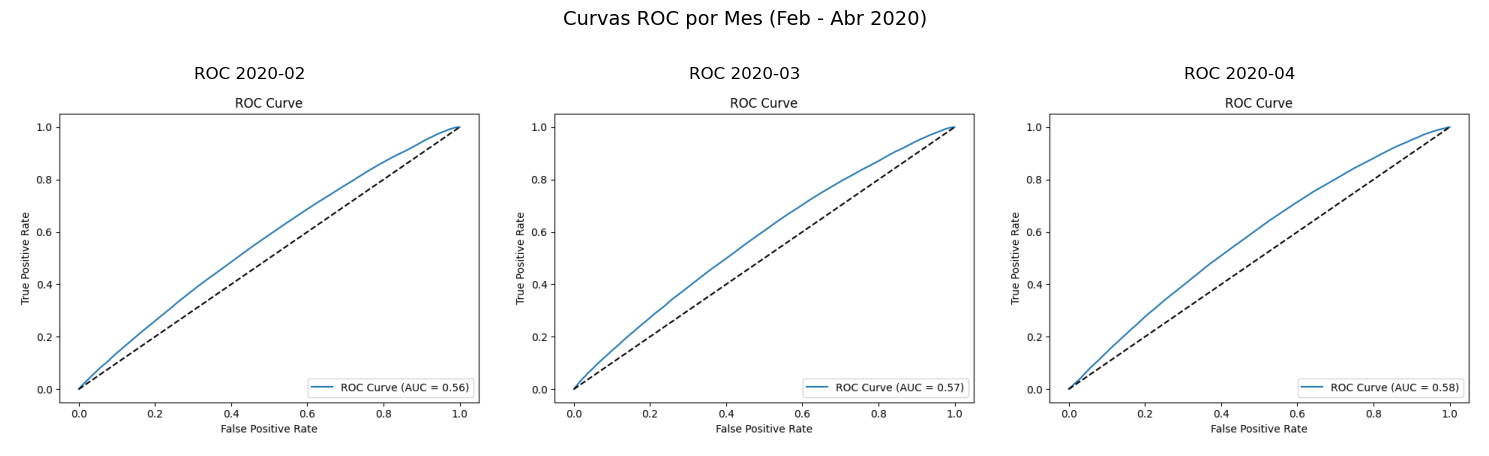

In [24]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta desde el notebook
roc_dir = os.path.join("..", "visualization", "roc_curve")
output_path = os.path.join(roc_dir, "roc_curve_consolidada.png")

# Orden explícito de los meses
meses_ordenados = ["2020-02", "2020-03", "2020-04"]
archivos_roc = [f"roc_curve_{mes}.png" for mes in meses_ordenados]

# Crear figura con subplots
fig, axs = plt.subplots(1, len(archivos_roc), figsize=(15, 5))

for i, archivo in enumerate(archivos_roc):
    img_path = os.path.join(roc_dir, archivo)
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"ROC {meses_ordenados[i]}")

plt.suptitle("Curvas ROC por Mes (Feb - Abr 2020)", fontsize=14)
plt.tight_layout()

# Guardar visualización consolidada
plt.savefig(output_path, dpi=300)

# Mostrar en pantalla
plt.show()


---

## D. Exploración de los dataset originales (enero a abril 2020)

In [59]:
from src.config import TRAIN_PROCESSED_PATH, TEST_PROCESSED_PATH, MESES_EVALUACION  # asegúrate de que estas variables estén definidas

# Cargar muestra procesada de entrenamiento
train_file = os.path.join(TRAIN_PROCESSED_PATH, "data_train.parquet")
df_train_proc = pd.read_parquet(train_file)
df_train_proc["origen"] = "2020-01"

# Cargar muestras procesadas por mes para evaluación
df_list = [df_train_proc]
for mes in MESES_EVALUACION:
    sample_file = os.path.join(TEST_PROCESSED_PATH, f"test_processed_{mes}.parquet")
    if os.path.exists(sample_file):
        df_mes = pd.read_parquet(sample_file)
        df_mes["origen"] = mes
        df_list.append(df_mes)
    else:
        print(f"Archivo no encontrado: {sample_file}")

# Concatenar todas las muestras procesadas
df_procesado = pd.concat(df_list, ignore_index=True)
df_procesado

,pickup_weekday,pickup_hour,work_hours,pickup_minute,passenger_count,trip_distance,trip_time,trip_speed,PULocationID,DOLocationID,RatecodeID,high_tip,origen
0,2.0,0.0,0.0,28.0,1.0,1.200000,288.0,0.004167,238.0,239.0,1.0,1,2020-01
1,2.0,0.0,0.0,35.0,1.0,1.200000,445.0,0.002697,239.0,238.0,1.0,1,2020-01
2,2.0,0.0,0.0,47.0,1.0,0.600000,371.0,0.001617,238.0,238.0,1.0,0,2020-01
3,2.0,0.0,0.0,55.0,1.0,0.800000,291.0,0.002749,238.0,151.0,1.0,1,2020-01
4,2.0,0.0,0.0,9.0,1.0,0.030000,53.0,0.000566,7.0,193.0,1.0,0,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15732180,3.0,23.0,0.0,30.0,-1.0,2.020000,540.0,0.003741,238.0,75.0,-1.0,0,2020-04
15732181,3.0,23.0,0.0,44.0,-1.0,3.300000,600.0,0.005500,263.0,230.0,-1.0,0,2020-04
15732182,3.0,23.0,0.0,25.0,-1.0,6.400000,780.0,0.008205,137.0,42.0,-1.0,0,2020-04
15732183,3.0,23.0,0.0,50.0,-1.0,25.700001,2275.0,0.011297,29.0,69.0,-1.0,0,2020-04


In [60]:

# Calcular número de registros y porcentaje
tabla_registros = (
    df_procesado["origen"]
    .value_counts()
    .sort_index()
    .rename("n_registros")
    .reset_index()
    .rename(columns={"index": "origen"})
)
tabla_registros["porcentaje"] = 100 * tabla_registros["n_registros"] / tabla_registros["n_registros"].sum()

tabla_registros

,origen,n_registros,porcentaje
0,2020-01,6316213,40.148352
1,2020-02,6219682,39.534763
2,2020-03,2965667,18.850954
3,2020-04,230623,1.465931


Si revisamos las cifras de los viajes en taxi, observamos que enero y febrero registran volúmenes similares, con más de 6 millones de viajes cada uno, lo que en conjunto representa cerca del 80% del total del dataset. En marzo, la cantidad de viajes disminuye considerablemente a aproximadamente 3 millones, y en abril se desploma de forma abrupta, alcanzando apenas los 200 mil viajes. Esta caída drástica evidencia el impacto de la pandemia del COVID-19 y las restricciones de movilidad que comenzaron a aplicarse. Esta distribución desequilibrada refleja un sesgo importante en el dataset, ya que los primeros meses muestran una realidad completamente distinta a la de abril, dificultando la capacidad del modelo para anticipar o predecir correctamente situaciones tan atípicas como las generadas por la pandemia.

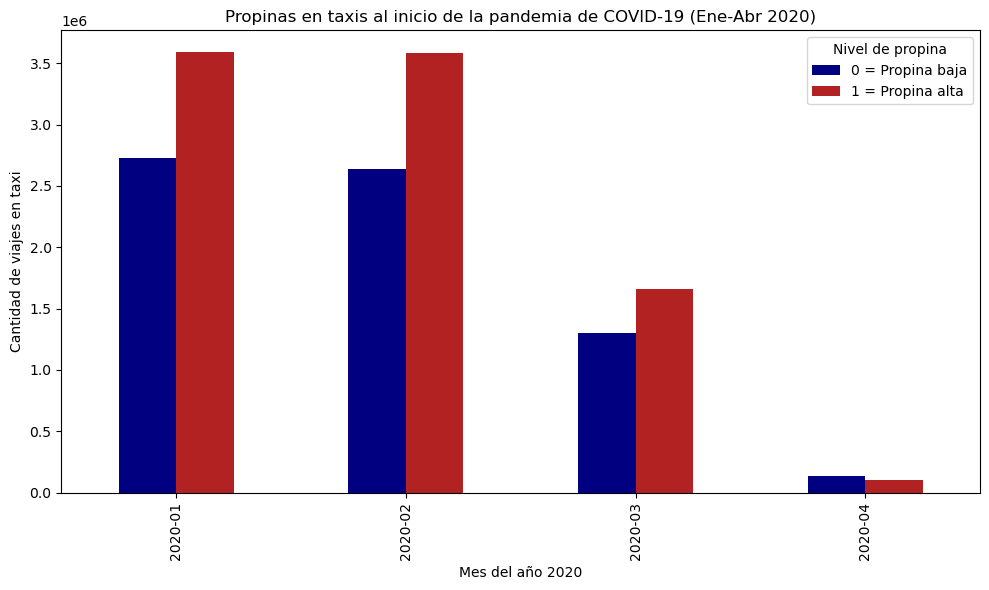

In [61]:
# Agrupar por mes y high_tip (0: baja, 1: alta)
conteo = df_procesado.groupby(["origen", "high_tip"]).size().unstack(fill_value=0)


# Crear carpeta si no existe
output_dir = os.path.join("..", "visualization", "analisis")
os.makedirs(output_dir, exist_ok=True)

# Graficar
ax = conteo.plot(
    kind="bar",
    stacked=False,
    figsize=(10, 6),
    color=["navy", "firebrick"]
)

plt.title("Propinas en taxis al inicio de la pandemia de COVID-19 (Ene-Abr 2020)")
plt.xlabel("Mes del año 2020")
plt.ylabel("Cantidad de viajes en taxi")
plt.legend(title="Nivel de propina", labels=["0 = Propina baja", "1 = Propina alta"])
plt.tight_layout()

# Guardar el gráfico
output_path = os.path.join(output_dir, "grafico_barras_evolucion_propinas_por_mes.png")
plt.savefig(output_path, dpi=300)
plt.show()

El gráfico muestra una distribución más equilibrada entre propinas altas y bajas durante los primeros tres meses de 2020, con una leve predominancia de propinas altas. Sin embargo, en abril se observa una drástica disminución en la cantidad total de viajes, lo que refleja el impacto inmediato de la pandemia.

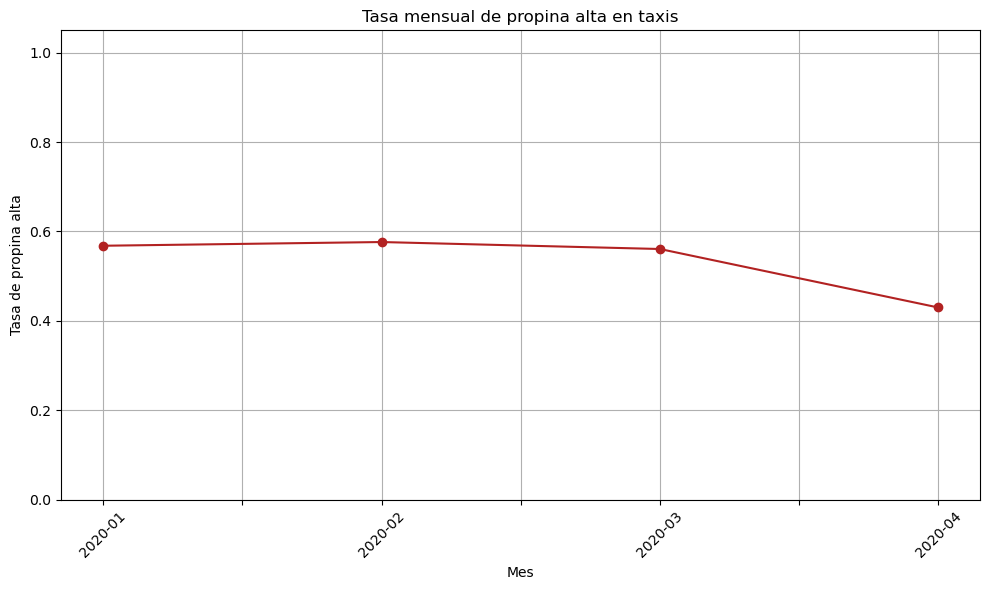

In [81]:
# Agrupar por mes y calcular la tasa de propina alta
tasa_propina = df_procesado.groupby("origen")["high_tip"].mean()

# Crear carpeta para guardar el gráfico
output_dir = os.path.join("..", "visualization", "analisis")
os.makedirs(output_dir, exist_ok=True)

# Graficar la evolución mensual de la tasa de propina alta
plt.figure(figsize=(10, 6))
tasa_propina.plot(marker="o", color="firebrick")
plt.title("Tasa mensual de propina alta en taxis")
plt.xlabel("Mes")
plt.ylabel("Tasa de propina alta")
plt.ylim(0, 1.05)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar gráfico
output_path = os.path.join(output_dir, "tasas_de_propinas_altas_por_mes.png")
plt.savefig(output_path, dpi=300)
plt.show()


La proporción de propinas altas se mantiene estable entre enero y marzo casi al 60%, pero disminuye bruscamente en abril alrededor del 40%. Esto podría deberse por consecuencia a las medidas de la pandemia.

---

## E. Datos entrenados y testeados (muestras de 100k)

In [49]:
from src.config import TRAIN_PROCESSED_PATH, TEST_PROCESSED_PATH, MESES_EVALUACION  # asegúrate de que estas variables estén definidas

# Cargar muestra procesada de entrenamiento
train_file = os.path.join(TRAIN_PROCESSED_PATH, "train_sample_100k.parquet")
df_train_proc = pd.read_parquet(train_file)
df_train_proc["origen"] = "2020-01"

# Cargar muestras procesadas por mes para evaluación
df_list = [df_train_proc]
for mes in MESES_EVALUACION:
    sample_file = os.path.join(TEST_PROCESSED_PATH, f"sample_processed_100k_{mes}.parquet")
    if os.path.exists(sample_file):
        df_mes = pd.read_parquet(sample_file)
        df_mes["origen"] = mes
        df_list.append(df_mes)
    else:
        print(f"Archivo no encontrado: {sample_file}")

# Concatenar todas las muestras procesadas
df_acum_muestra = pd.concat(df_list, ignore_index=True)
df_acum_muestra


,pickup_weekday,pickup_hour,work_hours,pickup_minute,passenger_count,trip_distance,trip_time,trip_speed,PULocationID,DOLocationID,RatecodeID,high_tip,origen
0,2.0,0.0,0.0,28.0,1.0,1.20,288.0,0.004167,238.0,239.0,1.0,1,2020-01
1,2.0,0.0,0.0,35.0,1.0,1.20,445.0,0.002697,239.0,238.0,1.0,1,2020-01
2,2.0,0.0,0.0,47.0,1.0,0.60,371.0,0.001617,238.0,238.0,1.0,0,2020-01
3,2.0,0.0,0.0,55.0,1.0,0.80,291.0,0.002749,238.0,151.0,1.0,1,2020-01
4,2.0,0.0,0.0,9.0,1.0,0.03,53.0,0.000566,7.0,193.0,1.0,0,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,2.0,12.0,1.0,42.0,1.0,2.60,617.0,0.004214,48.0,43.0,1.0,0,2020-04
399996,2.0,12.0,1.0,53.0,1.0,0.70,185.0,0.003784,43.0,239.0,1.0,0,2020-04
399997,2.0,12.0,1.0,7.0,2.0,1.47,534.0,0.002753,238.0,236.0,1.0,1,2020-04
399998,2.0,12.0,1.0,26.0,1.0,3.22,730.0,0.004411,151.0,161.0,1.0,0,2020-04


In [52]:

# Calcular número de registros y porcentaje
tabla_registros = (
    df_acum_muestra["origen"]
    .value_counts()
    .sort_index()
    .rename("n_registros")
    .reset_index()
    .rename(columns={"index": "origen"})
)
tabla_registros["porcentaje"] = 100 * tabla_registros["n_registros"] / tabla_registros["n_registros"].sum()

tabla_registros

,origen,n_registros,porcentaje
0,2020-01,100000,25.0
1,2020-02,100000,25.0
2,2020-03,100000,25.0
3,2020-04,100000,25.0


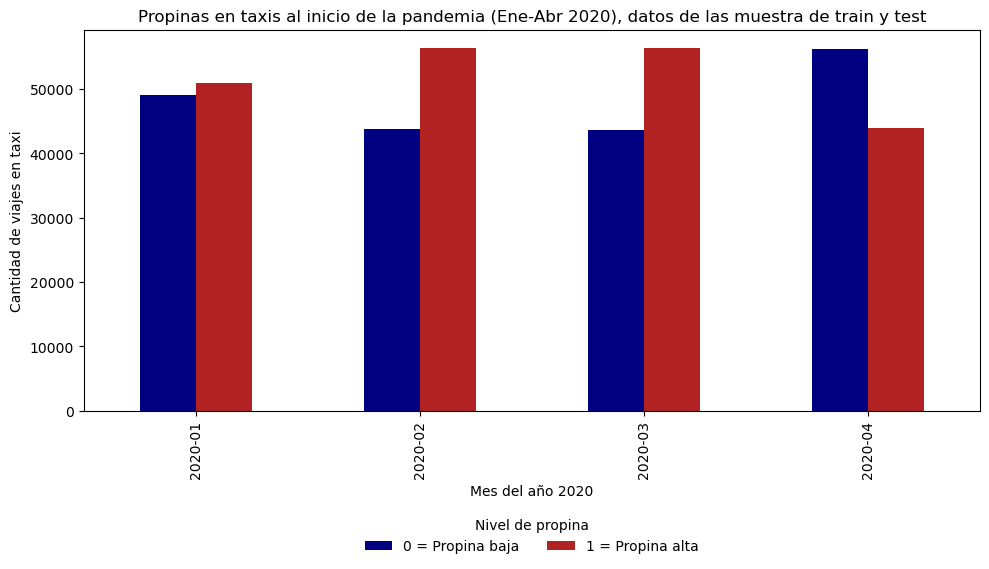

In [79]:
# Agrupar por mes y high_tip (0: baja, 1: alta)
conteo_muestra = df_acum_muestra.groupby(["origen", "high_tip"]).size().unstack(fill_value=0)

# Crear carpeta si no existe
output_dir = os.path.join("..", "visualization", "analisis")
os.makedirs(output_dir, exist_ok=True)

# Graficar
ax = conteo_muestra.plot(
    kind="bar",
    stacked=False,
    figsize=(10, 6),
    color=["navy", "firebrick"]
)

plt.title("Propinas en taxis al inicio de la pandemia (Ene-Abr 2020), datos de las muestra de train y test")
plt.xlabel("Mes del año 2020")
plt.ylabel("Cantidad de viajes en taxi")

# Leyenda horizontal abajo del gráfico
plt.legend(
    title="Nivel de propina",
    labels=["0 = Propina baja", "1 = Propina alta"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=2,
    frameon=False
)

plt.tight_layout()
output_path = os.path.join(output_dir, "grafico_barras_evolucion_propinas_por_mes_muestra_100k.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # bbox_inches asegura que la leyenda no se recorte
plt.show()


Este gráfico representa el número de viajes por mes y nivel de propina, usando la muestra de 100.000 registros mensuales.

La tendencia no es parecida a la rea, no se observa la baja dratica en el numero de viajes del mes de abril.
Solo se observa que invierte las clases, que en abril hay más propinas bajas que altas.


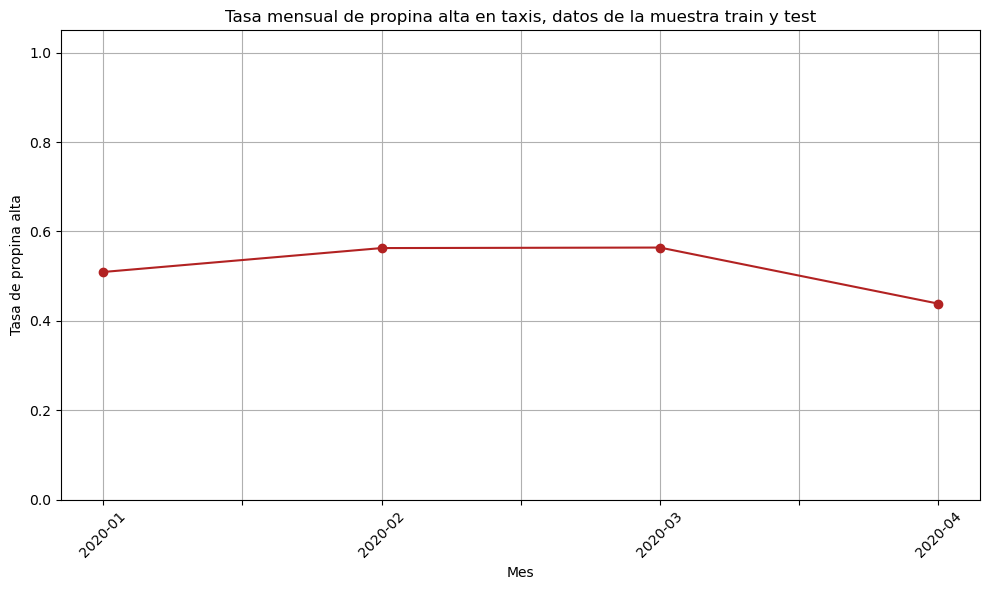

In [80]:

# Agrupar por mes y calcular la tasa de propina alta
tasa_propina = df_acum_muestra.groupby("origen")["high_tip"].mean()

# Crear carpeta para guardar el gráfico
output_dir = os.path.join("..", "visualization", "analisis")
os.makedirs(output_dir, exist_ok=True)

# Graficar la evolución mensual de la tasa de propina alta
plt.figure(figsize=(10, 6))
tasa_propina.plot(marker="o", color="firebrick")
plt.title("Tasa mensual de propina alta en taxis, datos de la muestra train y test")
plt.xlabel("Mes")
plt.ylabel("Tasa de propina alta")
plt.ylim(0, 1.05)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar gráfico
output_path = os.path.join(output_dir, "tasa_propina_mensual_100k.png")
plt.savefig(output_path, dpi=300)
plt.show()


Este gráfico, muestra la evolución de la tasa de propinas altas mensuales sobre la muestra de train y test.
Se ve que tasa de propinas altas en enero es similar a abril, baja en comparación a febrero y marzo. En contraste, a las tasas de propinas altas que muestra el grafico que usa todos los datos.

---

# 2. ¿El modelo mantiene un rendimiento consistente?

R: En las métricas y la curvas de ROC de la sección anterior, se muestra un tendencia estable y parecida, no se observan cambios drasticos.

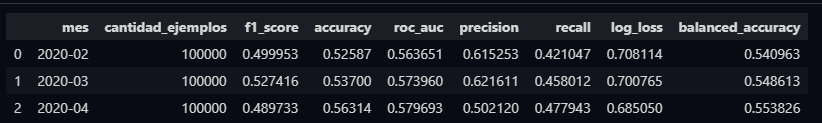



Sin embargo, las matrices de confusión entregan un matiz adicional al análisis. En abril, el modelo muestra un comportamiento diferente, incrementando notablemente la cantidad de falsos negativos, es decir, predice con mayor frecuencia la clase "propina baja" cuando en realidad fue "propina alta". 

Todo se vuelve más claro al observar la evolución mensual de las propinas altas y bajas: a lo largo de los meses, ambas disminuyen su frecuencia, pero en abril ocurre un punto crítico donde se revierte el desbalance de clases, predominando las propinas bajas sobre las altas. Este cambio drástico en la distribución de la variable objetivo afecta directamente al modelo, que comienza a predecir más falsos negativos, es decir, clasifica como propina baja cuando en realidad fue alta. 

``Por tanto, aunque las métricas globales parecen estables, la matriz de confusión revela un deterioro específico en la capacidad del modelo para identificar correctamente las propinas altas.``

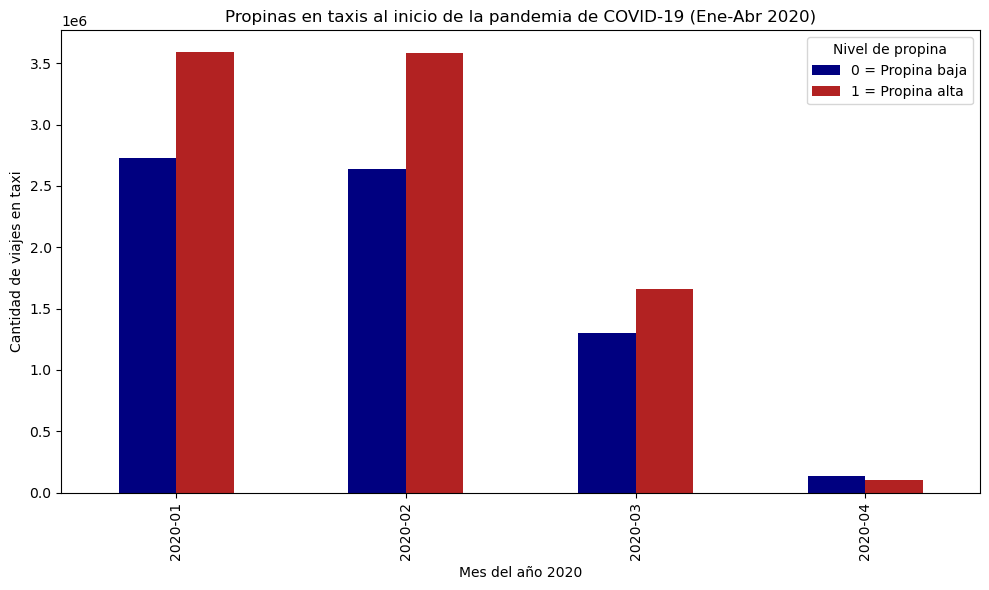

``Conclusión``:
Aunque las métricas globales como el F1-score, precisión y accuracy no presentan cambios drásticos, el modelo no mantiene un rendimiento verdaderamente consistente. Al analizar las matrices de confusión y la evolución de la distribución de clases, se evidencia que en abril el modelo comienza a fallar más al predecir correctamente las propinas altas. Esto se debe a que el desbalance de clases cambia significativamente durante ese mes, con un aumento de las propinas bajas, lo que impacta directamente en la capacidad del modelo para generalizar correctamente.




---

# 3. ¿Qué factores podrían explicar la variación en el desempeño?

Uno de los principales factores es que la muestra de entrenamiento no fue representativa de la realidad observada en los meses posteriores. El modelo fue entrenado con datos de enero, donde la distribución de propinas era distinta y más equilibrada. Sin embargo, durante la pandemia —especialmente en abril— se observa un cambio abrupto en el comportamiento de los usuarios, aumentando la proporción de propinas bajas y modificando así el desbalance de clases.

Esto genera un desajuste entre lo aprendido por el modelo y el nuevo contexto, afectando su capacidad de generalización. Además, es probable que el cambio en las condiciones sociales y económicas propias del inicio de la pandemia haya impactado el comportamiento de los pasajeros, alterando patrones que el modelo no fue capaz de anticipar.

Tal como se observa en el gráfico, tanto en la muestra de entrenamiento como en la de testeo, las clases se invierten y se evidencia una baja drástica en la cantidad total de viajes, sobre todo en abril, lo que coincide con la implementación de medidas sanitarias más estrictas.

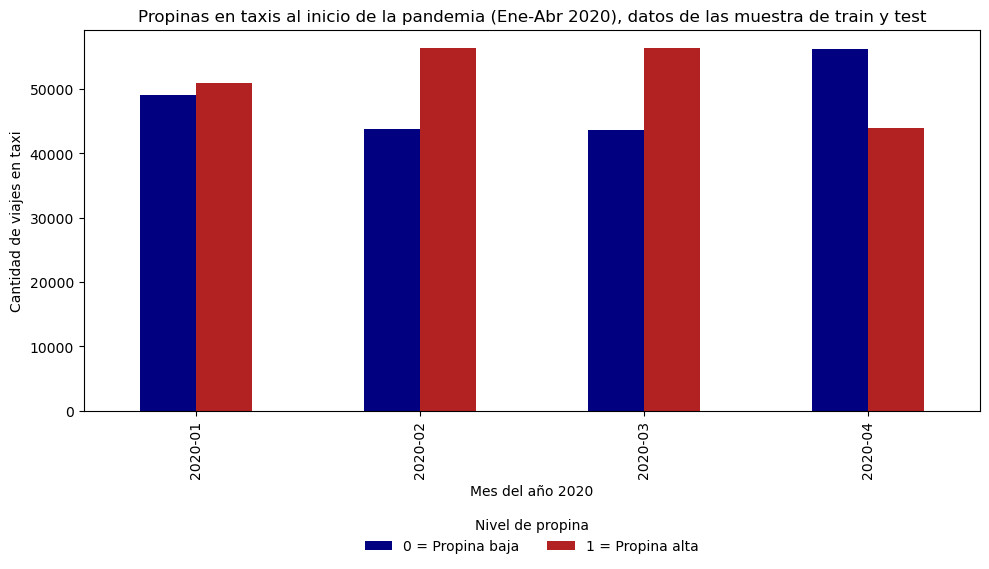

---

## 4. ¿Qué acciones recomendarías para mejorar la robustez del modelo en el tiempo?

Para mejorar la robustez del modelo en el tiempo, una de las primeras recomendaciones es entrenar el modelo con una muestra que sea representativa de la realidad completa del fenómeno, ya sea utilizando todo el mes o múltiples meses. En este caso, entrenar solo con datos de enero —cuando los patrones eran estables— generó un modelo que no fue capaz de adaptarse a los cambios drásticos posteriores, como ocurrió durante la pandemia.

En situaciones donde se utilicen muestras (por ejemplo, de 100 mil registros), estas deben mantener las proporciones reales del total de datos. En enero y febrero, hubo alrededor de 6 millones de registros, por lo que una muestra proporcionalmente representativa a ese volumen tiene sentido. Sin embargo, en meses como abril, donde los viajes bajaron a solo 200 mil, la muestra debería reducirse proporcionalmente para no sobre-representar ese mes.

Además, es fundamental monitorear los cambios en la distribución de clases a lo largo del tiempo. Si se detecta una disminución drástica en la frecuencia de ambas clases o una inversión en el desbalance, como se observó en abril, el modelo debe ser ajustado. Para esto, se recomienda revisar no solo las métricas globales, sino también la matriz de confusión, la curva ROC y otras métricas desagregadas por mes, que permiten identificar sesgos o deterioro en el rendimiento.

Finalmente, implementar un esquema de entrenamiento continuo o por ventanas temporales podría ayudar a capturar mejor los cambios en los patrones de comportamiento, adaptando el modelo a nuevas realidades a medida que estas evolucionan.


